### 目标函数  $J(\theta) =MSE(y,y^*;\theta) + \alpha\frac{1}{2}\sum_{i=0}^n\theta^2_i$ 尽可能小

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
x = np.random.uniform(-3., 3., size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

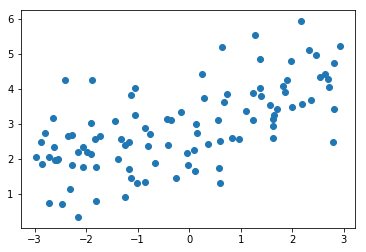

In [4]:
plt.scatter(x, y)
plt.show()

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def PolynomialRegression(degree):
    return  Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('line_reg', LinearRegression())
    ])

In [8]:
from sklearn.model_selection import train_test_split
np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [9]:
poly10_reg = PolynomialRegression(degree=20)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

167.9401087009438

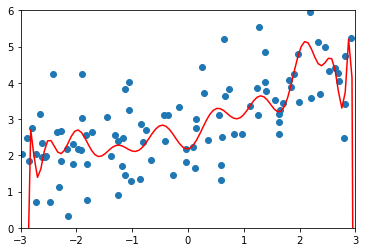

In [10]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly10_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

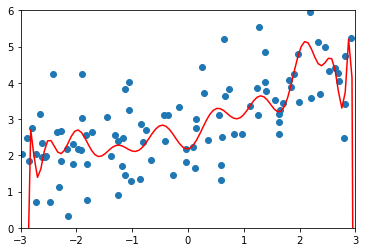

In [11]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:, 0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

plot_model(poly10_reg)

### 使用岭回归

In [13]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return  Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('ridge_reg', Ridge(alpha=alpha))
    ])

In [15]:
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y1_predict, y_test)

1.3233492754155471

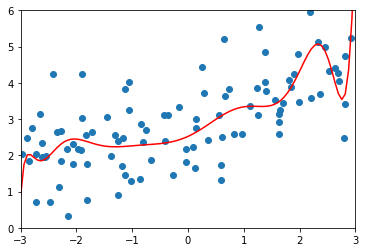

In [16]:
plot_model(ridge1_reg)

In [17]:
ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y2_predict, y_test)

1.1888759304218448

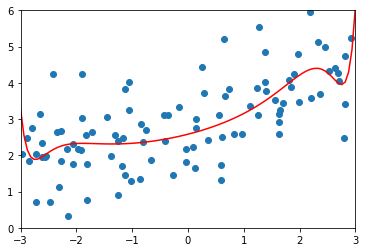

In [18]:
plot_model(ridge2_reg)

In [19]:
ridge3_reg = RidgeRegression(20, 100)
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y3_predict, y_test)

1.3196456113086197

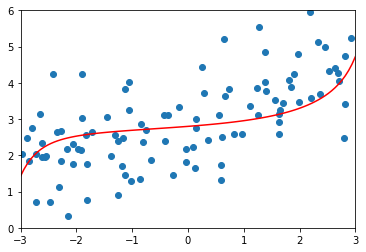

In [20]:
plot_model(ridge3_reg)

### LASSO Regression

### 目标函数  $J(\theta) =MSE(y,y^*;\theta) + \alpha\sum_{i=0}^n|\theta_i|$     尽可能小

In [21]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return  Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lasso_reg', Lasso(alpha=alpha))
    ])

In [22]:
lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)
y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.1496080843259961

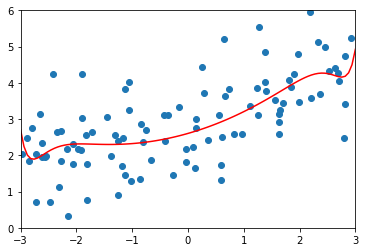

In [23]:
plot_model(lasso1_reg)

In [24]:
lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)
y2_predict = lasso2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1213911351818648

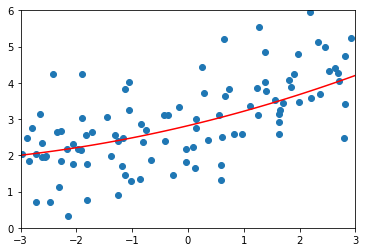

In [25]:
plot_model(lasso2_reg)

In [26]:
lasso3_reg = LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)
y3_predict = lasso3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.8408939659515595

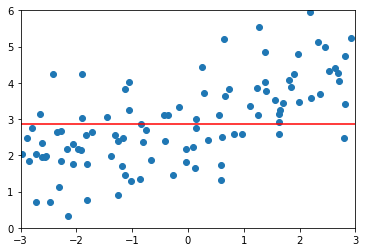

In [27]:
plot_model(lasso3_reg)

###  Lasso 趋向于是一部分theta的值变为0（也有可能将有用的theta变为0），可用于特征选择

### 目标函数  $J(\theta) =MSE(y,y^*;\theta) + \alpha\sum_{i=0}^n|\theta_i|$     尽可能小

### 两者比较

### Ridge:      $J(\theta) =MSE(y,y^*;\theta) + \alpha\frac{1}{2}\sum_{i=0}^n\theta^2_i$

### 后半部分求导  
$\Delta=
\alpha\begin{bmatrix}
\theta_1 \\
\theta_2 \\
\cdots \\
\theta_n 
\end{bmatrix}$


### Lasso:   $J(\theta) =MSE(y,y^*;\theta) + \alpha\sum_{i=0}^n|\theta_i|$ 

### 后半部分求导 

$\Delta=
\alpha\begin{bmatrix}
sign(\theta_1) \\
sign(\theta_2) \\
\cdots \\
sign(\theta_n) 
\end{bmatrix}$  

其中  $ sign(x)=\left\{
\begin{array}{rcl}
1       &      & {x > 0}\\
0     &      & {x = 0}\\
-1     &      & {x \leq 0 }
\end{array} \right. $



### Ridge   
$$ \frac{1}{2}\sum_{i=1}^n\theta_i^2$$

### Lasso
$$ \alpha\sum_{i=0}^n|\theta_i|$$

### MSE
$$\frac{1}{n}\sum_{i=0}^n(y_i-\hat{y_i})^2$$
### MAE
$$\frac{1}{n}\sum_{i=0}^n|y_i-\hat{y_i}|$$

### 欧拉距离
$$\sqrt{\sum_{i=1}^n(x_i^{(1)}-x_i^{(2)})^2}$$

### 曼哈顿距离
$$\sum_{i=1}^n|x_i^{(1)}-x_i^{(2)}|$$

### 明可夫斯基距离
$$\left( \sum_{i=1}^n|X_i^{(a)} - X_i^{(b)} | ^p     \right)^{\frac{1}{p}}$$

### Lp范数

$$||x||_p=\left(  \sum_{i=1}^n |x_i|^p      \right)^{\frac{1}{p}}$$

### L2正则项(范数)
$$\sum_{i=1}^n\theta_i^2$$

### L1正则项(范数)
$$\sum_{i=1}^n|\theta_i|$$

### 弹性网 Elastic Net

$$J(\theta)=MSE(y,\hat{y};\theta)  + r\alpha\sum_{i=1}^n|\theta_i|   +  \frac{1-r}{2}\alpha\sum_{i=1}^n\theta_i^2 $$